In [2]:
import os
import sys
import numpy as np 
import matplotlib.pyplot as plt


## **Ex 0. Getting Started: Cyclic Hopfield model**


In [ ]:
def generate_patterns(P,N): 
    """
    Generates P random flatt patterns of size N 
    Args:
        P (int): Number of patterns
        N (int): Size of each pattern
    """
    return np.random.choice([-1,1], size =(P, N))

def compute_overlaps(patterns, S): 
    """"
    Computes the overlaps between patterns P and state S
    Args:
        patterns (numpy.ndarray): Patterns of size (P, N)
        S (numpy.ndarray): State of size (N,)
    """
    N = patterns.shape[1]
    m = np.dot(patterns,S) / N
    return m #(P,)

def compute_state_S(m,patterns, S, beta): 
    """
    Computes the state S
    Args:
        patterns (numpy.ndarray): Patterns of size (P, N)
        S (numpy.ndarray): State of size (N,)
        beta (float): Scalar parameter
    """
    m_minus_1 = np.roll(m, 1)
    S_update = np.tanh(beta * np.dot(m_minus_1, patterns)) 
    return S_update #(N,)

def simulation(P = 10, N = 100, beta = 4, n_max = 20, plot= True, control_cycle = True):
    """
    Simulates the evolution of the state S and the overlaps m
    Args:
        P (int, optional): Number of patterns
        N (int, optional): Number of neurons
        beta (int, optional): Scalar parameter
        n_max (int, optional): Number of iterations
        plot (bool, optional): Whether to plot the overlaps evolution
        control_cycle (bool, optional): Whether to control the cycle of overlaps and early stop the simulation
    """
    m_track = []
    patterns = generate_patterns(P, N) 
    S= patterns[0,:].copy().astype(float) #initial state is the first pattern
    S_track = [S.copy()]
    previous_m = None
    for n,i in enumerate(range(n_max)): 
        m = compute_overlaps(patterns, S)
        S = compute_state_S(m, patterns, S, beta)
        S_track.append(S.copy())
        m_track.append(m)
        if control_cycle :
            max_overlap = np.argmax(m)
            if n == 0 : 
                previous_m = max_overlap
                continue
            else :
                if previous_m == P-1 : 
                    if max_overlap == 0 or max_overlap == P-1 : 
                        previous_m = max_overlap
                        if n == n_max - 1 : 
                            print("Simulation finished | Cycle retreived")
                        continue
                    else : 
                        print("Early stopping itt: {} | Cycle not retreived in correct order {} -> {}".format(n,previous_m, max_overlap))
                        break
                if max_overlap == previous_m or max_overlap == previous_m + 1 : 
                    previous_m = max_overlap
                    if n == n_max - 1 : 
                        print("Simulation finished | Cycle retreived")
                    continue
                else : 
                    print("Early stopping itt: {} | Cycle not retreived in correct order {} -> {}".format(n,previous_m, max_overlap))
                    break
        

    m_track = np.array(m_track)
    S_track = np.array(S_track)
    if plot : 
        plt.figure(figsize=(10, 5))
        for mu in range(P):
            plt.plot(m_track[:, mu], label=f'Pattern_{mu + 1}')
        plt.title('Overlaps Evolution')
        plt.xlabel('Iteration')
        plt.ylabel('Overlap')
        plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
           ncol=5, fancybox=True,)
        # plt.tight_layout()
        plt.show()
    
    return  patterns, S_track, m_track

## **Ex 1. Sequence storage and retrieval**


Simulation finished | Cycle retreived


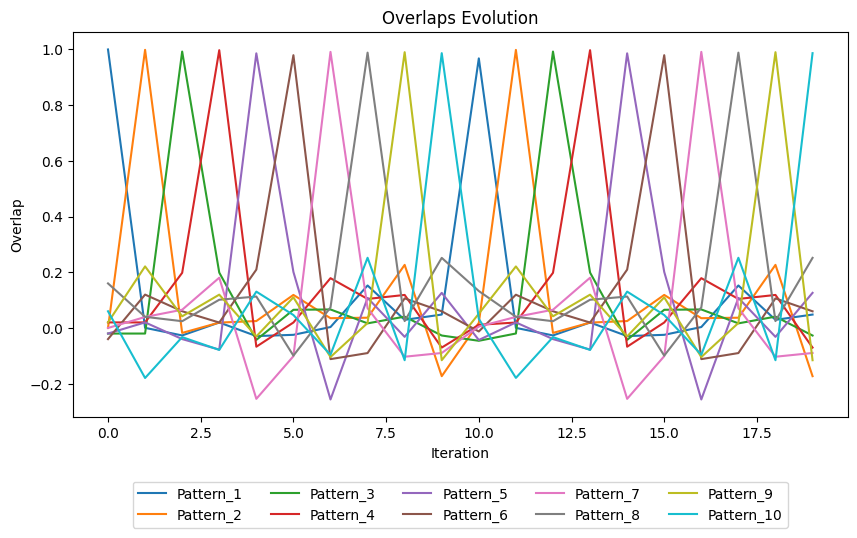

Early stopping itt: 8 | Cycle not retreived in correct order 7 -> 9


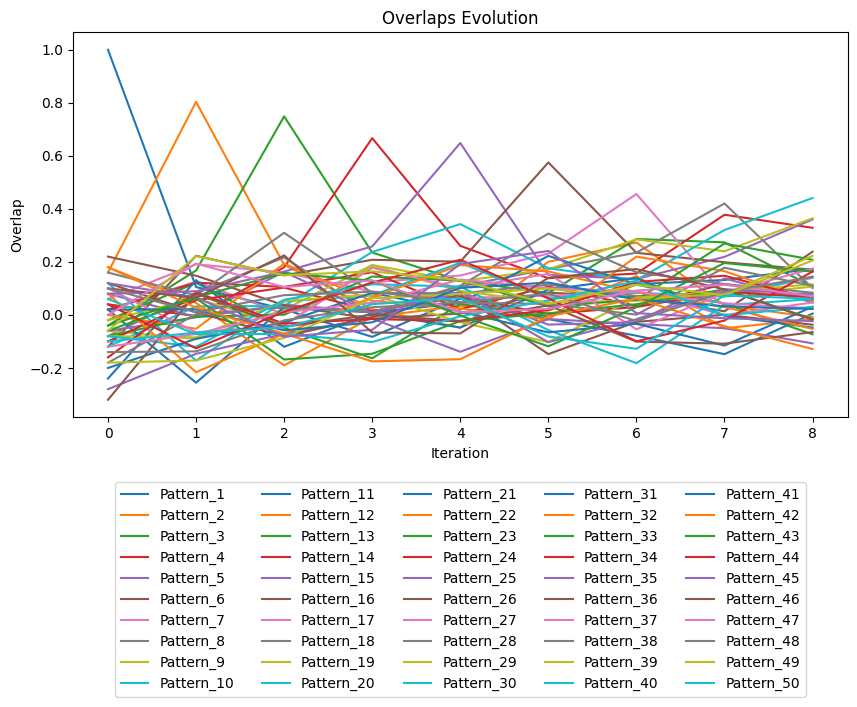

In [12]:
# Cycle retrieving control implemented directly in sumulation function allowing early stop
sim_P10 = simulation()
sim_P50 = simulation(P = 50)

In [ ]:
# def is_cycle_retreived( P = 10, N = 100, beta = 4, n_max = 20, plot= False, ):
#     """
#     Checks if the cycle is retrieved
#     Args:
#         m_stack (numpy.ndarray): Overlaps of size (n_max, P)
#         P (int, optional): Number of patterns
#         N (int, optional): Number of neurons
#         beta (int, optional): Scalar parameter
#         n_max (int, optional): Number of iterations
#         plot (bool, optional): Whether to plot the overlaps evolution
#     """
#     _, _, m_stack = simulation(P, N, beta, n_max, plot)
#     max_overlap = np.argmax(m_stack, axis=1)
#     prev_index = max_overlap[0]
#     for i in max_overlap[1:]:
#         if prev_index == P-1:
#             if i == prev_index or i == 0 :
#                 prev_index = i
#                 continue
#             else:
#                 print("Cycle not retrieved")
#                 return False
#         if i == prev_index or i == prev_index + 1:
#             prev_index = i
#             continue
#         else:
#             print("Cycle not retrieved")
#             return False
          
#     print("Cycle retrieved")
#     return True
            
        
    
# retreived_10 = is_cycle_retreived()    
# retreived_50 = is_cycle_retreived(P = 50)
  
     
    

Cycle retrieved
Cycle not retrieved
